In [102]:
import Orange
import matplotlib.pyplot as plt
%matplotlib inline

## Branje podatkov

Preberemo podatke o ocenah dijakov in si v seznam shranimo ocene iz kemije in fizike.

In [103]:
data = Orange.data.Table("data/grades")
x = [d["fiz"] for d in data]
y = [d["kem"] for d in data]

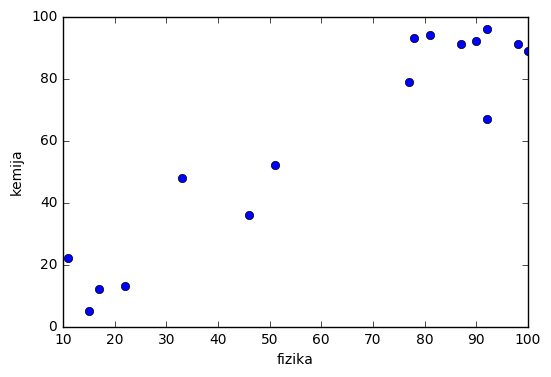

In [104]:
plt.plot(x, y, "o")
plt.xlabel("fizika")
plt.ylabel("kemija");
plt.savefig("fiz-kem.png")

## Linearna regresija

Zapišemo osvežitveni korak za univariatno linearno regresijo, kjer je model podan z parametroma a in b.

In [105]:
def update(a, b, alpha=0.0001):
    cons = alpha / len(x)
    a = a - cons * sum(((a*xi+b)-yi)*xi for xi, yi in zip(x, y))
    b = b - cons * sum(((a*xi+b)-yi) for xi, yi in zip(x, y))
    return a, b

Določimo začetno točko (začetne vrednosti a in b) in za nekaj iteracij izpišemo rezultate optimizacije teh parametrov.

In [106]:
a, b = 0, 0
for _ in range(10):
    a, b = update(a, b)
    print("%.3f %.3f" % (a, b))

0.479 0.003
0.726 0.005
0.852 0.006
0.918 0.006
0.951 0.006
0.968 0.006
0.977 0.007
0.982 0.007
0.984 0.007
0.985 0.007


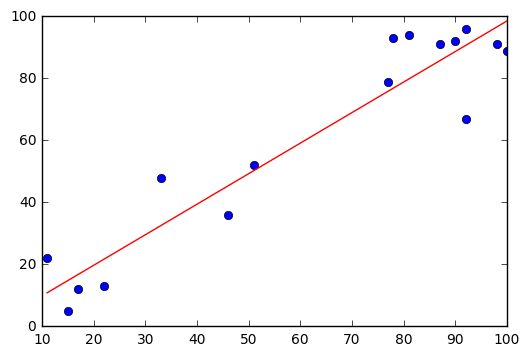

In [107]:
f = lambda x, a=a, b=b: a*x+b

xmm = min(x), max(x)
ymm = [f(x, a, b) for x in xmm]
plt.plot(x, y, "o")
plt.plot(xmm, ymm, "r-");
plt.savefig("fiz-kem-opt-model.png")

## Pomožne funkcije in slike za zapiske predavatelja

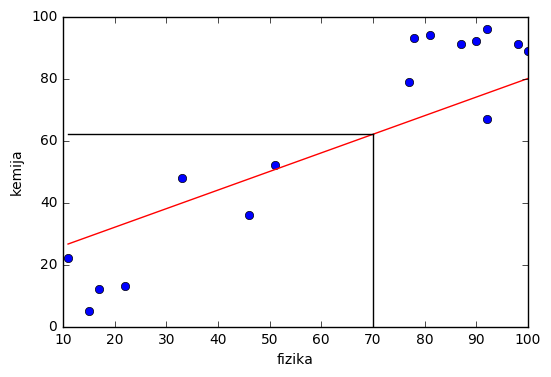

In [108]:
a, b = 0.6, 20
f = lambda x, a=a, b=b: a*x+b
ymm = [f(x) for x in xmm]
plt.plot(x, y, "o")
plt.plot(xmm, ymm, "r-")
plt.plot([70, 70], [0, f(70)], "k")
plt.plot([min(x), 70], [f(70), f(70)], "k")
plt.xlabel("fizika")
plt.ylabel("kemija");
plt.savefig("fiz-kem-priblizno.png")

In [109]:
f(70)

62.0

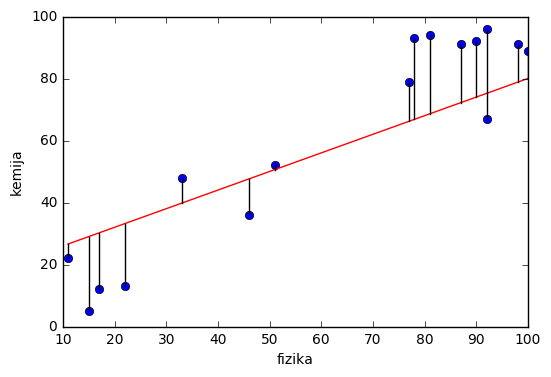

In [110]:
plt.plot(x, y, "o")
plt.plot(xmm, ymm, "r-")
for xi, yi in zip(x, y):
    plt.plot([xi, xi], [yi, f(xi)], "k")
plt.xlabel("fizika")
plt.ylabel("kemija");
plt.savefig("fiz-kem-eps.png")